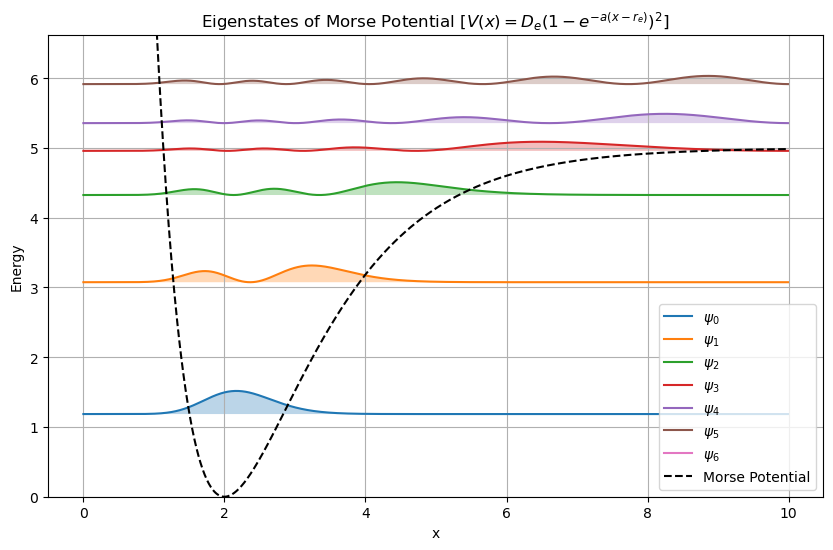

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def solve_morse_potential(x_max, dx, D_e=1, a=1, r_e=1, m=1):
    '''Function to compute the matrix elements, eigenvalues, 
    and eigenvectors of the Hamiltonian for the Morse potential 
    within a box defined by (0, x_max, dx).
    D_e is the depth of the potential well, a is the width of the well,
    r_e is the equilibrium bond distance, and m is the mass of the particle.'''

    h_bar = 1  # Planck's reduced constant (set to 1 for simplicity)

    def potential(x):
        '''Computes the Morse potential energy for a given position array x.'''
        return D_e * (1 - np.exp(-a * (x - r_e)))**2

    def kinetic_energy(x):
        '''Computes the kinetic energy matrix using the finite difference method.'''
        dx = x[1] - x[0]
        n = len(x)
        laplacian = np.diag(-2.0 * np.ones(n)) + np.diag(np.ones(n - 1), k=1) + np.diag(np.ones(n - 1), k=-1)
        laplacian /= dx**2
        return -(h_bar**2) / (2 * m) * laplacian

    def hamiltonian_matrix(x_values):
        '''Computes the Hamiltonian matrix.'''
        n = len(x_values)
        H_kinetic = kinetic_energy(x_values)
        H_potential = np.diag(potential(x_values))
        return H_kinetic + H_potential

    def compute_eigenstates(x_values):
        '''Computes the matrix elements, eigenstates, and eigenvalues of the Hamiltonian.'''
        H_matrix = hamiltonian_matrix(x_values)
        eigenvalues, eigenvectors = np.linalg.eigh(H_matrix)
        return H_matrix, eigenvalues, eigenvectors

    # Define the spatial grid starting from 0
    x_values = np.arange(0, x_max, dx)
    
    # Store the matrix elements, eigenvalues, and eigenvectors of the Hamiltonian
    H_morse, eig_val_morse, eig_vec_morse = compute_eigenstates(x_values)

    return H_morse, eig_val_morse, eig_vec_morse, x_values

# Example usage:
x_max, dx = 10, 0.01
D_e, a, r_e = 5, 0.8, 2
m = 1
H_morse, eig_val_morse, eig_vec_morse, x_values = solve_morse_potential(x_max, dx, D_e, a, r_e, m)

# Plot the results
plt.figure(figsize=(10, 6))
scale_for_plot = 40
for i in range(min(7, len(eig_val_morse))):
    plt.plot(x_values, eig_val_morse[i] * np.ones(len(x_values)) + scale_for_plot*np.abs(eig_vec_morse[:, i])**2, label=f'$\psi_{i}$')
    plt.fill_between(x_values, eig_val_morse[i] * np.ones(len(x_values)) + scale_for_plot*np.abs(eig_vec_morse[:, i])**2,
                     eig_val_morse[i] * np.ones(len(x_values)), alpha=0.3)

plt.plot(x_values, D_e * (1 - np.exp(-a * (x_values - r_e)))**2, 'k--', label='Morse Potential')
plt.ylim([0, eig_val_morse[min(6, len(eig_val_morse)-1)]])
plt.xlabel('x')
plt.ylabel('Energy')
plt.title('Eigenstates of Morse Potential ['r'$V(x) = D_e \left(1 - e^{-a (x - r_e)}\right)^2$]')
plt.legend()
plt.grid(True)
plt.show()